In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.


## Get the Data

In [9]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

In [10]:
df_with_results = pd.read_csv("results/all_data_and_results.csv", index_col=0, skiprows=[0,2])
df_with_results.head()

,pop,cp,cr,pov_head,gdp_pc_pp,shewp,shewr,social_p,social_r,gdp_pc_pp_nat,...,dK,delta_W,dcap,dcar,dKtot,dWpc_curency,dWtot_currency,risk,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Abra,51167,92.828972,203.891421,0.271936,173.689487,0,0,0.173531,0.203457,236.389964,...,13.522670,0.000575,234.547085,214.542261,138382.887676,7.189597,367870.125628,0.041393,0.376173,0.015571
Agusan del Norte,141357,82.348426,234.816324,0.276778,192.616487,0,0,0.147336,0.226521,236.389964,...,14.543882,0.000597,214.490836,240.371824,411175.896491,7.470865,1056058.995206,0.038786,0.389349,0.015101
Agusan del Sur,141595,83.304081,216.087522,0.372958,166.564929,0,0,0.126444,0.113334,236.389964,...,13.564573,0.000728,222.163274,251.506871,384135.135883,9.110153,1289952.127855,0.054694,0.297790,0.016287
Aklan,123269,79.445859,211.619510,0.204461,184.595206,0,0,0.184183,0.239542,236.389964,...,13.451300,0.000521,198.212003,213.211705,331625.665781,6.516314,803259.538225,0.035301,0.412850,0.014574
Albay,267030,76.582210,224.008585,0.339106,174.015387,0,0,0.201804,0.213554,236.389964,...,13.607047,0.000654,187.048390,232.907634,726697.962188,8.178083,2183793.572676,0.046996,0.332769,0.015639


## Map the data

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, but for that it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).

In [11]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [12]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

The [blank map of the Philippines](map/PHL_adm1.svg) we use here is an SVG.
(It was built starting from a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org), that was simplified with  [mapshaper.org](http://mapshaper.org) then converted to SVG with [Kartograph](http://kartograph.org/))

In [13]:
# path to the blank map 
svg_file_path = "map/PHL_adm1.svg"

#### First block: risk to assets 

Missing in SVG: Cotabato; Cotabato City; Davao; Isabela City; Manila; Ncr-2Nd Dist.; Ncr-3Rd Dist.; Ncr-4Th Dist.; Samar (Western)
Missing in series: Davao Del Norte; Dinagat Islands; Metropolitan Manila; North Cotabato; Samar; Shariff Kabunsuan


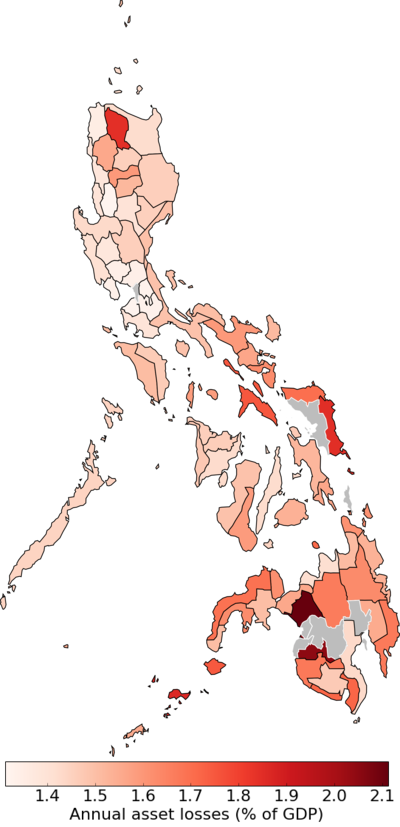

In [14]:
make_map_from_svg(
        df_with_results.risk_to_assets, #data 
        svg_file_path,                  #path to blank map
        outname="asset_risk",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        color_maper=plt.cm.get_cmap("Reds"), #color scheme (from matplotlib. Chose them from http://colorbrewer2.org/)
        label="Annual asset losses (% of GDP)",
        new_title="Map of asset risk in the Philippines"  #title for the colored SVG
)

#### Second block: socio-economic capacity 

Missing in SVG: Cotabato; Cotabato City; Davao; Isabela City; Manila; Ncr-2Nd Dist.; Ncr-3Rd Dist.; Ncr-4Th Dist.; Samar (Western)
Missing in series: Davao Del Norte; Dinagat Islands; Metropolitan Manila; North Cotabato; Samar; Shariff Kabunsuan


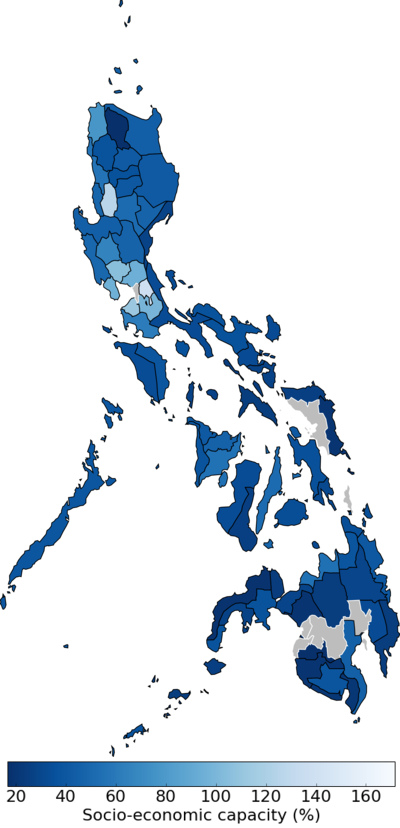

In [19]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("Blues_r"), 
        label="Socio-economic capacity (%)",
        new_title="Map of socio-economic capacity in the Philippines")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

Missing in SVG: Cotabato; Cotabato City; Davao; Isabela City; Manila; Ncr-2Nd Dist.; Ncr-3Rd Dist.; Ncr-4Th Dist.; Samar (Western)
Missing in series: Davao Del Norte; Dinagat Islands; Metropolitan Manila; North Cotabato; Samar; Shariff Kabunsuan


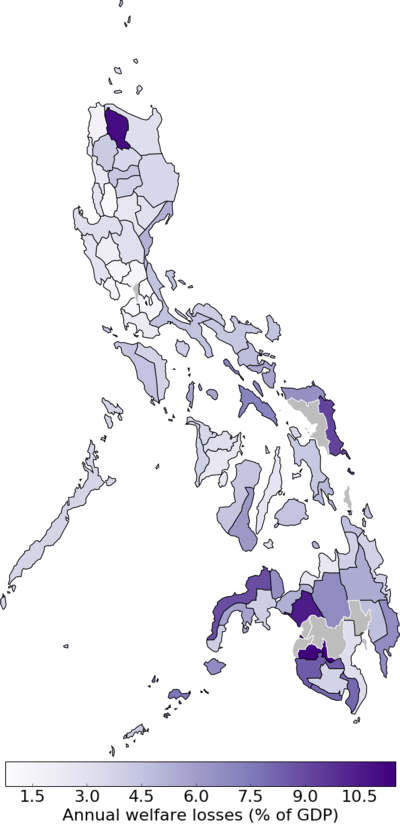

In [18]:
make_map_from_svg(
        df_with_results.risk, 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Annual welfare losses (% of GDP)",
        new_title="Map of welfare risk in the Philippines")